<a href="https://colab.research.google.com/github/rmonzon98/mini-proyecto-MYS/blob/master/Mini_proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Integrantes:
* Raúl Monzon 17014
* David Valenzuela 171001

# MINI PROYECTO 1
---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt 
from random import random
import math
from PIL import Image, ImageDraw

## Ejercicio	1 
El	triángulo	de	Shierpinski

En este ejercicio nosotros elegimos la probabilidad de cada función
* Para la primera función la probabilidad será de 0.2.
* Para la segunda función la probabilidad será de 0.3.
* Para la tercera función la probabilidad será de 0.5.

Haciendo que p1 + p2 + p3 = 1

In [ ]:
def elegir_funcion(probabilidades):
  numero = random()
  if (numero < probabilidades[0]):
    return 1
  elif ( (numero >= probabilidades[0]) and ( numero < probabilidades[0] + probabilidades[1]) ):
    return 2
  else: 
    return 3

Las funciones son las siguientes:
* Point f1(Point p): return Point(p.x/2, p.y/2)
* Point f2(Point p): return Point(p.x/2 + 0.5, p.y/2)
* Point f3(Point p): return Point(p.x/2 + 0.25, p.y/2 + 0.5)

In [ ]:
cantidad_simulacion = 100000

funciones = {
    1: lambda p: (p[0]/2, p[1]/2),
    2: lambda p: ((p[0]/2) + 0.5, p[1]/2),
    3: lambda p: ((p[0]/2) + 0.25, (p[1]/2) + 0.5)
}

#Creamos los arrays
x = np.random.rand(cantidad_simulacion,1)
y = np.random.rand(cantidad_simulacion,1)

#Aplicamos las funciones a todos los puntos
probabilidades = [0.33,0.33,0.34]
for i in range(0,10):
  for i in range(0,cantidad_simulacion):
      x[i], y[i] = funciones[elegir_funcion(probabilidades)]((x[i], y[i]))

Graficamos los puntos con las funciones ya aplicadas


probabilidades de las funciones 
Primera función:  0.33 
Segunda función:  0.33 
Tercera función:  0.34


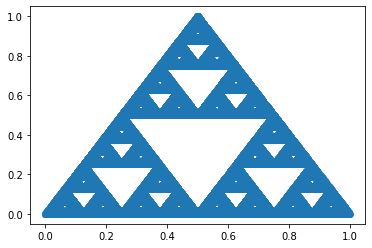

In [ ]:
print ("\nprobabilidades de las funciones",
       "\nPrimera función: ",probabilidades[0],
       "\nSegunda función: ",probabilidades[1],
       "\nTercera función: ",probabilidades[2])
plt.scatter(x=x,y=y)
plt.show()

Ejercicio 2
---
El	helecho	de	Barnsley

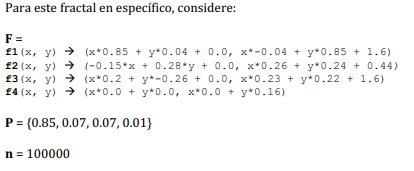

In [ ]:
def elegir_funcion_ej2(probabilidades):
  numero = random()
  if (numero < probabilidades[0]):
    return 1
  elif ( (numero >= probabilidades[0]) and ( numero < probabilidades[0] + probabilidades[1]) ):
    return 2
  elif ( (numero >= probabilidades[0] + probabilidades[1]) and ( numero < probabilidades[0] + probabilidades[1]) + probabilidades[2] ):
    return 3
  else: 
    return 4

In [ ]:
def helecho(funciones,probabilidades,n):
  puntos = []
  for i in range(0,n):
    funcion = elegir_funcion_ej2(probabilidades)
    puntos.append(funciones[funcion]((random(),random())))
  return puntos

In [ ]:
#Se declaran las funciones, probabilidades y cantidad de puntos a dibujar
funciones = {
  1: lambda p: (p[0]*0.85 + p[1]*0.04 + 0.0, p[0]*(-0.04) + p[1]*0.85 + 1.6),
  2: lambda p: ((-0.15)*p[0] + 0.28*p[1] + 0.0, p[0]*0.26+ p[1]*0.24+ 0.44),
  3: lambda p: (p[0]*0.2 + p[1]*(-0.26) + 0.0, p[0]*0.23 + p[1]*0.22 + 1.6),
  4: lambda p: (p[0]*0.0 + p[1]*0.0, p[0]*0.0 + p[1]*0.16)
}
probabilidades = [0.85,0.07,0.07,0.01]
n = 100000

In [ ]:
#Calculamos los puntos
puntos = helecho2(funciones,probabilidades,n)
puntos = np.array(puntos)


probabilidad de las funciones 
Primera función:  0.85 
Segunda función:  0.07 
Tercera función:  0.07 
Cuarta función:  0.01


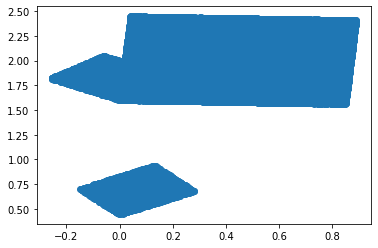

In [ ]:
print ("\nprobabilidad de las funciones"
      ,"\nPrimera función: ",probabilidades[0],"\nSegunda función: ",probabilidades[1],
       "\nTercera función: ",probabilidades[2],"\nCuarta función: ",probabilidades[3])
#Graficamos
plt.scatter(x=puntos[:,0],y=puntos[:,1])
plt.show()

Ejercicio 3
---
Análisis	de	pseudorandoms

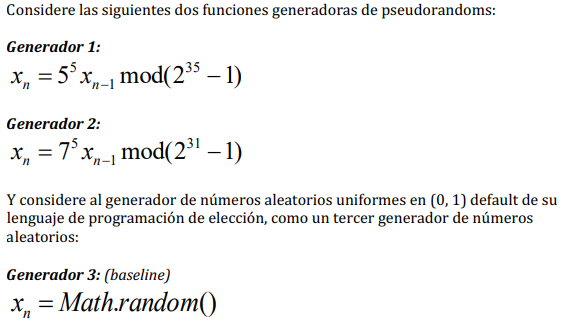

In [ ]:
def pseudo(a,m):
  def inner_pseudo(xo,n):
    items = list(range(n))
    items[0]=xo
    for i in range(1,n):
      items[i]=(a*items[i-1])%m
    return [i/ float(m) for i in items]
  return inner_pseudo

generador1 = pseudo(m=2**35-1,a=5**5)
generador2 = pseudo(m=2**31-1,a=7**5)

In [ ]:
def dibujar_histograma(numeros,titulo,cantidad):
  division = 100/cantidad
  print ("Histograma realizado con ",titulo,":\n")
  for i in range(1,11):
    cont = 0
    for j in numeros:
      if ( (j>=(i-1)*0.1) and (j<(i*.10)) ):
        cont = cont + 1
    print ( "{0:.2f}".format(((i-1)*0.1)),"-", "{0:.2f}".format(((i)*0.1)),": ",("*"*math.ceil((cont*division)))," (", cont,")\n" ) 
    

In [ ]:
#Se generan los números
cantidad = 100
numeros_generados_1 = generador1(xo=1,n=cantidad)
numeros_generados_2 = generador2(xo=1,n=cantidad)
numeros_random = np.random.rand(cantidad,1)
#Se imprimen
dibujar_histograma(numeros_random,"generador 1",cantidad)
dibujar_histograma(numeros_random,"generador 2",cantidad)
dibujar_histograma(numeros_random,"generador baseline",cantidad)

Histograma realizado con  generador 1 :

0.00 - 0.10 :  *************  ( 13 )

0.10 - 0.20 :  ***********  ( 11 )

0.20 - 0.30 :  *********  ( 9 )

0.30 - 0.40 :  ***********  ( 11 )

0.40 - 0.50 :  *********  ( 9 )

0.50 - 0.60 :  ********  ( 8 )

0.60 - 0.70 :  ********  ( 8 )

0.70 - 0.80 :  ********  ( 8 )

0.80 - 0.90 :  ***********  ( 11 )

0.90 - 1.00 :  ************  ( 12 )

Histograma realizado con  generador 2 :

0.00 - 0.10 :  *************  ( 13 )

0.10 - 0.20 :  ***********  ( 11 )

0.20 - 0.30 :  *********  ( 9 )

0.30 - 0.40 :  ***********  ( 11 )

0.40 - 0.50 :  *********  ( 9 )

0.50 - 0.60 :  ********  ( 8 )

0.60 - 0.70 :  ********  ( 8 )

0.70 - 0.80 :  ********  ( 8 )

0.80 - 0.90 :  ***********  ( 11 )

0.90 - 1.00 :  ************  ( 12 )

Histograma realizado con  generador baseline :

0.00 - 0.10 :  *************  ( 13 )

0.10 - 0.20 :  ***********  ( 11 )

0.20 - 0.30 :  *********  ( 9 )

0.30 - 0.40 :  ***********  ( 11 )

0.40 - 0.50 :  *********  ( 9 )

0.50

In [ ]:
#Se generan los números
cantidad = 5000
numeros_generados_1 = generador1(xo=1,n=cantidad)
numeros_generados_2 = generador2(xo=1,n=cantidad)
numeros_random = np.random.rand(cantidad,1)
#Se imprimen
dibujar_histograma(numeros_random,"generador 1",cantidad)
dibujar_histograma(numeros_random,"generador 2",cantidad)
dibujar_histograma(numeros_random,"generador baseline",cantidad)

Histograma realizado con  generador 1 :

0.00 - 0.10 :  ***********  ( 513 )

0.10 - 0.20 :  **********  ( 494 )

0.20 - 0.30 :  ***********  ( 521 )

0.30 - 0.40 :  **********  ( 481 )

0.40 - 0.50 :  ***********  ( 501 )

0.50 - 0.60 :  ***********  ( 508 )

0.60 - 0.70 :  ***********  ( 504 )

0.70 - 0.80 :  **********  ( 494 )

0.80 - 0.90 :  **********  ( 483 )

0.90 - 1.00 :  ***********  ( 501 )

Histograma realizado con  generador 2 :

0.00 - 0.10 :  ***********  ( 513 )

0.10 - 0.20 :  **********  ( 494 )

0.20 - 0.30 :  ***********  ( 521 )

0.30 - 0.40 :  **********  ( 481 )

0.40 - 0.50 :  ***********  ( 501 )

0.50 - 0.60 :  ***********  ( 508 )

0.60 - 0.70 :  ***********  ( 504 )

0.70 - 0.80 :  **********  ( 494 )

0.80 - 0.90 :  **********  ( 483 )

0.90 - 1.00 :  ***********  ( 501 )

Histograma realizado con  generador baseline :

0.00 - 0.10 :  ***********  ( 513 )

0.10 - 0.20 :  **********  ( 494 )

0.20 - 0.30 :  ***********  ( 521 )

0.30 - 0.40 :  **********  (

In [ ]:
#Se generan los números
cantidad = 100000
numeros_generados_1 = generador1(xo=1,n=cantidad)
numeros_generados_2 = generador2(xo=1,n=cantidad)
numeros_random = np.random.rand(cantidad,1)
#Se imprimen
dibujar_histograma(numeros_random,"generador 1",cantidad)
dibujar_histograma(numeros_random,"generador 2",cantidad)
dibujar_histograma(numeros_random,"generador baseline",cantidad)

Histograma realizado con  generador 1 :

0.00 - 0.10 :  ***********  ( 10018 )

0.10 - 0.20 :  **********  ( 9980 )

0.20 - 0.30 :  **********  ( 9924 )

0.30 - 0.40 :  ***********  ( 10072 )

0.40 - 0.50 :  **********  ( 9928 )

0.50 - 0.60 :  **********  ( 9964 )

0.60 - 0.70 :  **********  ( 9946 )

0.70 - 0.80 :  ***********  ( 10239 )

0.80 - 0.90 :  **********  ( 9938 )

0.90 - 1.00 :  **********  ( 9991 )

Histograma realizado con  generador 2 :

0.00 - 0.10 :  ***********  ( 10018 )

0.10 - 0.20 :  **********  ( 9980 )

0.20 - 0.30 :  **********  ( 9924 )

0.30 - 0.40 :  ***********  ( 10072 )

0.40 - 0.50 :  **********  ( 9928 )

0.50 - 0.60 :  **********  ( 9964 )

0.60 - 0.70 :  **********  ( 9946 )

0.70 - 0.80 :  ***********  ( 10239 )

0.80 - 0.90 :  **********  ( 9938 )

0.90 - 1.00 :  **********  ( 9991 )

Histograma realizado con  generador baseline :

0.00 - 0.10 :  ***********  ( 10018 )

0.10 - 0.20 :  **********  ( 9980 )

0.20 - 0.30 :  **********  ( 9924 )

0.30 

Ejercicio 4
---
integral unidimensional

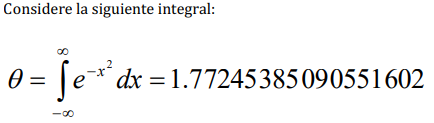

Llevamos la integral a un intervalo 0 a 1

<img src="https://i.postimg.cc/FzPwSYZ0/Screen-Shot-2020-08-29-at-6-50-41-PM.png" alt="drawing" width="350"/>

Creamos la funcion para calcular la integral con numeros aleatorios

In [ ]:
integrate = lambda f, n: sum([f(x) for x in np.random.rand(n)]) / n

Usamos la funcion encontrado

In [ ]:
func = lambda x: (2  * (math.e) ** (-( (1/x) -1)**2)) / (x ** 2)

Realizamos las aproximacion con 100, 10000, 1000000 iteraciones

In [ ]:
 [ {iters: integrate(func, iters)} for iters in [100, 10000, 1000000] ]

[{100: 1.715322323058358},
 {10000: 1.7872586179119077},
 {1000000: 1.7734342847038176}]

Ejercicio 5
---
integral	bidimensional

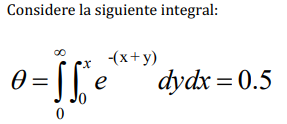

Llevamos la integral a un intervalo 0 a 1

<img src="https://i.postimg.cc/N04DFWbH/Screen-Shot-2020-08-29-at-6-56-47-PM.png" width="350">

Definimos un funcion de integracion con 2 dimensiones

In [ ]:
integrate = lambda f, n: sum([f(x, y) for x, y in np.random.rand(n, 2)]) / n

Usamos la funcion encontrada

In [ ]:
f = lambda x, y: (( (1/x) -1 ) * math.e**( - ( (1/x-1) + ( (1/x-1)*y ) )  )) / (x**2)

Realizamos las aproximacion con 100, 10000, 1000000 iteraciones

In [ ]:
 [ {iters: integrate(f, iters)} for iters in [100, 10000, 1000000] ]

[{100: 0.4785285244406572},
 {10000: 0.49605390168575125},
 {1000000: 0.5003139751403696}]